In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

plt.style.use("default")

c1 = math.sqrt(0.8)
c2 = math.sqrt(0.2)

Gt = 10 #DBi
Gr = 10 #DBi
R1 = 1.8 #bit per channel
Noise_Power = -70 #DBm

d2 = dr = 20 #m
dr1 = d12 = 10 #m
alpha = 4

Ps = np.arange(0, 31, 0.01)

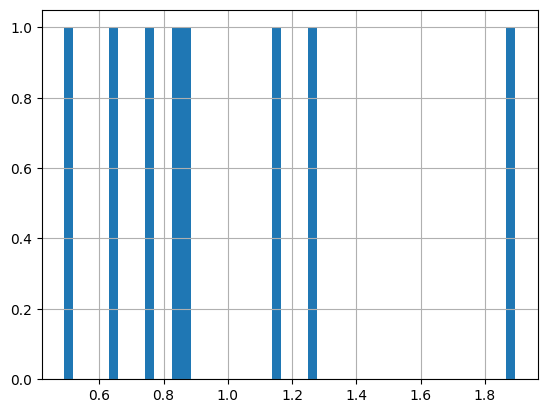

Expected value of E{g^2}: 1.145575663050964


In [ ]:
N = 8 # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation

# Rayleigh fading channel
X0 = np.random.normal(mu, sigma, N)
Y0 = np.random.normal(mu, sigma, N)
g0 = np.sqrt(X0**2 + Y0**2)

plt.hist(g0, bins=50, alpha=1)
plt.grid()
plt.show()

# Expected value of g^2
print("Expected value of E{g^2}:", np.mean(g0**2))

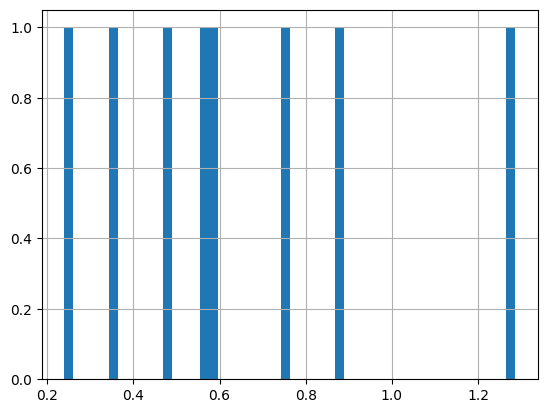

Expected value of E{g^2}: 0.5134435755080109


In [ ]:
N = 8 # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation

# Rayleigh fading channel
X1 = np.random.normal(mu, sigma, N)
Y1 = np.random.normal(mu, sigma, N)
g1 = np.sqrt(X1**2 + Y1**2)

plt.hist(g1, bins=50, alpha=1)
plt.grid()
plt.show()

# Expected value of g^2
print("Expected value of E{g^2}:", np.mean(g1**2))

In [ ]:
print('Value of G0')

In [ ]:
epsilon = np.sum(g0*g1)
print(epsilon)

5.679313839850305


In [ ]:
SNR = np.array([])
P1_NOMA = np.array([])

SNR = 1+ (Ps*np.square(c1)*np.square(epsilon)/(np.power(dr,alpha)*np.power(dr1,alpha)))/(Ps*np.square(c2)*np.square(epsilon)/(np.power(dr,alpha)*np.power(dr1,alpha))+1)
base = 2

Rate = np.log(SNR) / np.log(base)

Outage_Probability = Rate < R1 #determining the outage probability
Outage_Probability = Outage_Probability.astype(int)

print(Outage_Probability)

[1 1 1 ... 1 1 1]


**MONTE CARLO SIMULATION**

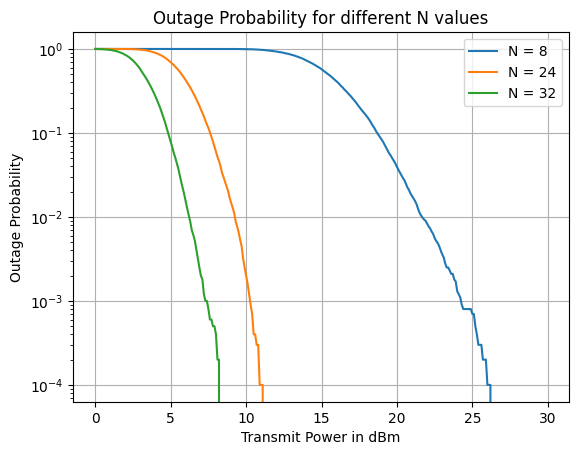

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iterations = 10000
N_values = [8, 24, 32]
R1 = 1.8
c1_sq = 0.8
c2_sq = 0.2
dr = 20
dr1 = 10
Ps_dbm = np.arange(0, 30, 0.1)
Ps = 10 ** (Ps_dbm / 10) * 1e-3
a = 4
mu, sigma = 0, np.sqrt(0.5)
n_user = 1
outage_prob_mat = np.array([])
Outage_Prob = np.zeros(len(Ps_dbm))

def L(d):
    L = d ** a
    return L

outage_probabilities = []

for N in N_values:
    Outage_Prob = np.zeros(len(Ps_dbm))

    for _ in range(iterations):
        X0 = np.random.normal(mu, sigma, N)
        Y0 = np.random.normal(mu, sigma, N)
        X1 = np.random.normal(mu, sigma, N)
        Y1 = np.random.normal(mu, sigma, N)

        g0 = np.sqrt(X0 ** 2 + Y0 ** 2)
        g1 = np.sqrt(X1 ** 2 + Y1 ** 2)

        eps = np.sum(g0 * g1)

        SNR = (((Ps * c1_sq * eps ** 2) / (L(dr) * L(dr1))) / (((Ps * c2_sq * eps ** 2) / (L(dr) * L(dr1))) + 1e-10))
        rate = np.log2(1 + SNR)
        P = rate < R1
        P = P.astype(int)

        Outage_Prob += P

    Outage_Prob /= iterations
    outage_probabilities.append(Outage_Prob)

# Plotting the outage probabilities for each N value
plt.yscale('log')
for i, N in enumerate(N_values):
    plt.plot(Ps_dbm, outage_probabilities[i], label=f"N = {N}")

plt.xlabel("Transmit Power in dBm")
plt.ylabel("Outage Probability")
plt.title("Outage Probability for different N values")
plt.legend()
plt.grid()
plt.show()


In [ ]:
Ps_dbm = -70
Ps = 10 ** (Ps_dbm / 10) * 1e-3
in_dbm = 10*np.log10(Ps*1e3)
in_dbm

-70.0